In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Category 0
df0 =pd.read_csv(r'/gdrive/Shareddrives/FYP Project/Dataset_October25_Clustering/FoodData_group0.csv')
# Category 1
df1 =pd.read_csv(r'/gdrive/Shareddrives/FYP Project/Dataset_October25_Clustering/FoodData_group1.csv')
# Category 2
df2 =pd.read_csv(r'/gdrive/Shareddrives/FYP Project/Dataset_October25_Clustering/FoodData_group2.csv')
# Category 3
df3 =pd.read_csv(r'/gdrive/Shareddrives/FYP Project/Dataset_October25_Clustering/FoodData_group3.csv')


In [5]:
# Combine all categories
df_all = pd.concat([df0, df1, df2, df3])

In [6]:
# Calculate saturated fat as a percentage of total fat
fat_column = (df_all["Saturated Fat (g)"]/df_all["Fats (g)"])*100

In [7]:
df_category = df_all.copy()
df_category["Saturated Fat (g)"] = fat_column

In [8]:
labels = ["low","medium", "high"]
# Cut of criteria
cut_off_values = {
    "Calories (kcal)":(100,200),
    "Protein (g)": (10, 20),
    "Fats (g)": (5,15),
    "Carbs (g)": (10, 30),
    "Fiber (g)": (1, 5),
    "Sugar (g)": (2, 12),
    "Phosphorus (mg)": (100, 300),
    "Potassium (mg)": (100, 300),
    "Sodium (mg)": (500, 1000),
    "Saturated Fat (g)": (20, 50),
    "Trans Fat (g)": (0.5, 2)
}

In [9]:
# Apply cutoff margins
for key,values in cut_off_values.items():
  cond_list = [df_category[key].between(0, values[0],"left"), df_category[key].between(values[0], values[1],"both"), df_category[key].between(values[1], np.inf,"neither")]
  df_category[key] = np.select(cond_list, ["low", "medium", "high"], 0)

In [10]:
df_category

,Unnamed: 0,Name,Group,GI,Calories (kcal),Protein (g),Fats (g),Carbs (g),Fiber (g),Sugar (g),Phosphorus (mg),Potassium (mg),Sodium (mg),Saturated Fat (g),Trans Fat (g),Category
0,4,"Cake, fruitcake, commercially prepared",baked-products,0,high,low,medium,high,medium,high,low,medium,low,low,low,0
1,6,"Cake, pound, commercially prepared, butter (in...",baked-products,0,high,low,medium,high,low,high,medium,medium,low,medium,low,0
2,7,Cheesecake commercially prepared,baked-products,0,high,low,high,medium,low,high,low,low,low,medium,low,0
3,9,"Cookies, butter, commercially prepared, enriched",baked-products,0,high,low,high,high,low,high,medium,medium,low,high,low,0
4,13,"Cookies, shortbread, commercially prepared, plain",baked-products,1,high,low,high,high,medium,high,low,low,low,medium,medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,540,"Vegetables, mixed, frozen, cooked, boiled, dra...",vegetables,1,low,low,low,medium,medium,medium,low,medium,low,medium,low,3
225,542,"Drumstick pods, raw",vegetables,0,low,low,low,low,medium,low,low,high,low,low,low,3
226,543,"Peppers, hot chili, green, raw",vegetables,0,low,low,low,low,medium,medium,low,high,low,low,low,3
227,544,"Shallots, raw",vegetables,0,low,low,low,medium,medium,medium,low,high,low,medium,low,3


In [ ]:
df_category['Calories (kcal)'].value_counts()

high      262
low       197
medium     91
Name: Calories (kcal), dtype: int64

In [11]:
# Create a copy of data set
df_std = df_category.copy()

In [ ]:
df_std = df_std.drop(["Unnamed: 0"], axis=1)

In [ ]:
df_std["Group"].unique()

array(['baked-products', 'beverages', 'diary', 'fast-foods', 'grains',
       'meat', 'oils-and-sauces', 'seafood', 'spices', 'sweets',
       'vegetables', 'fruits', 'greens', 'meals-entrees-side-dishes',
       'nuts', 'soups', 'mashrooms'], dtype=object)

In [22]:
GI_high_food = df_std[df_std["GI"]==2]

In [23]:
GI_high_food

,Unnamed: 0,Name,Group,GI,Calories (kcal),Protein (g),Fats (g),Carbs (g),Fiber (g),Sugar (g),Phosphorus (mg),Potassium (mg),Sodium (mg),Saturated Fat (g),Trans Fat (g),Category
10,72,"Alcoholic beverage, liqueur, coffee with cream...",beverages,2,high,low,high,medium,low,high,low,low,low,high,low,0
34,123,"Nuts, coconut milk, raw (liquid expressed from...",diary,2,high,low,high,low,medium,medium,medium,medium,low,high,low,0
41,237,"Millet, raw",grains,2,high,medium,low,high,high,low,medium,medium,low,low,low,0
70,442,"Spices, anise seed",spices,2,high,medium,high,high,high,low,high,high,low,low,low,0
2,5,"Cake, gingerbread, prepared from recipe",baked-products,2,high,low,high,high,low,low,low,high,low,medium,low,1
7,19,"Croutons, plain",baked-products,2,high,medium,medium,high,high,low,medium,medium,medium,medium,low,1
23,47,"Alcoholic beverage, beer, regular, all",beverages,2,low,low,low,low,low,low,low,low,low,0,low,1
50,128,"Fast foods, nachos, with cheese",fast-foods,2,high,low,high,high,medium,medium,medium,high,low,low,low,1
61,172,"Pummelo, raw",fruits,2,low,low,low,low,medium,low,low,medium,low,low,low,1
67,189,"Jackfruit, raw",fruits,2,low,low,low,medium,medium,high,low,high,low,medium,low,1


In [32]:
random_food = GI_high_food.loc[[65]]

In [33]:
random_food

,Unnamed: 0,Name,Group,GI,Calories (kcal),Protein (g),Fats (g),Carbs (g),Fiber (g),Sugar (g),Phosphorus (mg),Potassium (mg),Sodium (mg),Saturated Fat (g),Trans Fat (g),Category
65,177,"Watermelon, raw",fruits,2,low,low,low,low,low,medium,low,medium,low,low,low,3


In [31]:
df_std.columns

Index(['Unnamed: 0', 'Name', 'Group', 'GI', 'Calories (kcal)', 'Protein (g)',
       'Fats (g)', 'Carbs (g)', 'Fiber (g)', 'Sugar (g)', 'Phosphorus (mg)',
       'Potassium (mg)', 'Sodium (mg)', 'Saturated Fat (g)', 'Trans Fat (g)',
       'Category'],
      dtype='object')

In [36]:
df_std[(df_std["GI"]==0) & (df_std["Group"]=="fruits") & (df_std["Category"]==3)].head()

,Unnamed: 0,Name,Group,GI,Calories (kcal),Protein (g),Fats (g),Carbs (g),Fiber (g),Sugar (g),Phosphorus (mg),Potassium (mg),Sodium (mg),Saturated Fat (g),Trans Fat (g),Category
44,141,"Apples, raw, with skin",fruits,0,low,low,low,medium,medium,medium,low,medium,low,low,low,3
45,142,"Apricots, raw",fruits,0,low,low,low,medium,medium,medium,low,medium,low,low,low,3
46,143,"Avocados, raw, all commercial varieties",fruits,0,medium,low,medium,low,high,low,low,high,low,low,low,3
48,147,"Blueberries, raw",fruits,0,low,low,low,medium,medium,medium,low,low,low,low,low,3
49,152,"Grapefruit, raw, pink and red, all areas",fruits,0,low,low,low,medium,medium,medium,low,medium,low,low,low,3


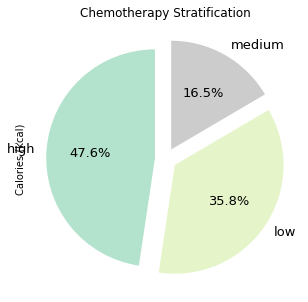

In [ ]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1,0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Chemotherapy Stratification'
)

df_category['Calories (kcal)'].value_counts().plot.pie(**kwargs)